In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

In [47]:

pathfile=r'data_anonymous'

# reflist: list of epc in each box
reflist=pd.DataFrame()
# 
files=os.listdir(pathfile)
for file in files:
    print(file)
    if file.startswith('reflist_'):
        temp=pd.read_csv(os.path.join(pathfile,file),sep=',').reset_index(drop=True)[['Epc']]
        temp['refListId']=file.split('.')[0]
        reflist=reflist.append(temp)
reflist=reflist.rename(columns={'refListId':'refListId_actual'})
reflist['refListId_actual']=reflist['refListId_actual'].apply(lambda x:int(x[8:]))
Q_refListId_actual=reflist.groupby('refListId_actual')['Epc'].nunique().rename('Q refListId_actual').reset_index(drop=False)
reflist=pd.merge(reflist,Q_refListId_actual,on='refListId_actual',how='left')
reflist.head()

ano_APTags-TagsAutomatedProcess-2019-11-07-16_29_46.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-16_57_34.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_16_18.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_32_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_58_50.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_13_30.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_21_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_30_01.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_38_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_49_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_00_26.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_10_51.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_20_14.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_29_54.csv
ano_APTags-TagsAutomatedProcess-2019-11-08-10_55_25.csv
ano_supply-process.2019-11-07-CUT.csv
reflist_0.olpn
reflist_1.olpn
reflist_2.olpn
reflist_3.olpn
reflist_4.olpn
reflist_5.olpn
reflist_6.olpn
reflist_7.olpn
re

,Epc,refListId_actual,Q refListId_actual
0,epc_90,0,16
1,epc_91,0,16
2,epc_92,0,16
3,epc_93,0,16
4,epc_94,0,16


In [48]:
# pathfile=r'data_anonymous'
# 
# df : rfid readings
df=pd.DataFrame()
# 
files=os.listdir(pathfile)
for file in files:
    print(file)
    if file.startswith('ano_APTags'):
        temp=pd.read_csv(os.path.join(pathfile,file),sep=',')
        df=df.append(temp)
df['LogTime']=pd.to_datetime (df['LogTime'] ,format='%Y-%m-%d-%H:%M:%S') 
df['TimeStamp']=df['TimeStamp'].astype(float)
df['Rssi']=df['Rssi'].astype(float)
df=df.drop(['Reader','EmitPower','Frequency'],axis=1).reset_index(drop=True)
df=df[['LogTime', 'Epc', 'Rssi', 'Ant']]
# antennas 1 and 2 are facing the box when photocell in/out 
Ant_loc=pd.DataFrame({'Ant':[1,2,3,4],'loc':['in','in','out','out']})
df=pd.merge(df,Ant_loc,on=['Ant'])
df=df.sort_values('LogTime').reset_index(drop=True)
df.head()

ano_APTags-TagsAutomatedProcess-2019-11-07-16_29_46.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-16_57_34.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_16_18.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_32_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_58_50.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_13_30.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_21_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_30_01.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_38_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_49_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_00_26.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_10_51.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_20_14.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_29_54.csv
ano_APTags-TagsAutomatedProcess-2019-11-08-10_55_25.csv
ano_supply-process.2019-11-07-CUT.csv
reflist_0.olpn
reflist_1.olpn
reflist_2.olpn
reflist_3.olpn
reflist_4.olpn
reflist_5.olpn
reflist_6.olpn
reflist_7.olpn
re

,LogTime,Epc,Rssi,Ant,loc
0,2019-11-07 15:32:10,epc_100,-69.0,3,out
1,2019-11-07 15:32:10,epc_97,-69.0,3,out
2,2019-11-07 15:32:10,epc_97,-65.0,3,out
3,2019-11-07 15:32:10,epc_99,-70.0,3,out
4,2019-11-07 15:32:10,epc_100,-66.0,3,out


In [49]:
len(df)

1204003

In [50]:
# timing: photocells a time window for each box: start/stop (ciuchStart, ciuchStop)
file=r'ano_supply-process.2019-11-07-CUT.csv'
timing=pd.read_csv(os.path.join(pathfile,file),sep=',')
timing['file']=file
timing['date']=pd.to_datetime(timing['date'],format='%d/%m/%Y %H:%M:%S,%f')
timing['ciuchStart']=pd.to_datetime(timing['ciuchStart'],format='%d/%m/%Y %H:%M:%S,%f')
timing['ciuchStop']=pd.to_datetime(timing['ciuchStop'],format='%d/%m/%Y %H:%M:%S,%f')
timing['timestampStart']=timing['timestampStart'].astype(float)
timing['timestampStop']=timing['timestampStop'].astype(float)
timing=timing.sort_values('date')
timing.loc[:,'refListId']=timing.loc[:,'refListId'].apply(lambda x:int(x[8:]))
timing=timing[['refListId', 'ciuchStart', 'ciuchStop']]
timing[:1]

,refListId,ciuchStart,ciuchStop
0,0,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197


In [51]:
len(timing)

389

In [52]:
timing[:12]

,refListId,ciuchStart,ciuchStop
0,0,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197
1,1,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463
2,2,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447
3,3,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591
4,4,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528
5,5,2019-11-07 18:54:29.422,2019-11-07 18:54:31.278
6,6,2019-11-07 18:54:34.953,2019-11-07 18:54:36.685
7,7,2019-11-07 18:54:40.829,2019-11-07 18:54:42.611
8,8,2019-11-07 18:54:46.383,2019-11-07 18:54:48.158
9,9,2019-11-07 18:54:52.122,2019-11-07 18:54:54.051


In [53]:
# ciuchStart_up starts upstream ciuchStart, half way in between the previous stop and the actual start
timing[['ciuchStop_last']]=timing[['ciuchStop']].shift(1)
timing[['refListId_last']]=timing[['refListId']].shift(1)
timing['ciuchStartup']=timing['ciuchStart'] - (timing['ciuchStart'] - timing['ciuchStop_last'])/2
# timing start: 10sec before timing
timing.loc[0,'refListId_last']=timing.loc[0,'refListId']
timing.loc[0,'ciuchStartup']=timing.loc[0,'ciuchStart']-datetime.timedelta(seconds=10)
timing.loc[0,'ciuchStop_last']=timing.loc[0,'ciuchStartup']-datetime.timedelta(seconds=10)
timing['refListId_last']=timing['refListId_last'].astype(int)
# 
timing['ciuchStopdown']= timing['ciuchStartup'].shift(-1)
timing.loc[len(timing)-1,'ciuchStopdown']=timing.loc[len(timing)-1,'ciuchStop']+datetime.timedelta(seconds=10)
timing=timing[['refListId', 'refListId_last','ciuchStartup', 'ciuchStart','ciuchStop','ciuchStopdown']]
timing.head()

,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown
0,0,0,2019-11-07 18:53:42.369999872,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.416999936
1,1,0,2019-11-07 18:53:58.416999936,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463,2019-11-07 18:54:09.024999936
2,2,1,2019-11-07 18:54:09.024999936,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447,2019-11-07 18:54:16.694500096
3,3,2,2019-11-07 18:54:16.694500096,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591,2019-11-07 18:54:21.636999936
4,4,3,2019-11-07 18:54:21.636999936,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528,2019-11-07 18:54:27.475000064


In [54]:
# box 0 always starts
timing[timing['refListId']==0].head()

,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown
0,0,0,2019-11-07 18:53:42.369999872,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.416999936
10,0,9,2019-11-07 18:54:55.894500096,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.764999936
20,0,9,2019-11-07 18:55:53.460499968,2019-11-07 18:55:55.497,2019-11-07 18:55:57.377,2019-11-07 18:55:59.567500032
30,0,9,2019-11-07 18:56:51.316999936,2019-11-07 18:56:53.344,2019-11-07 18:56:55.215,2019-11-07 18:56:57.241499904
40,0,9,2019-11-07 18:58:02.390500096,2019-11-07 18:58:04.351,2019-11-07 18:58:06.212,2019-11-07 18:58:11.428000000


In [55]:
# t0_run = a new run starts when box 0 shows up
t0_run=timing[timing['refListId']==0] [['ciuchStartup']]
t0_run=t0_run.rename(columns={'ciuchStartup':'t0_run'})
t0_run=t0_run.groupby('t0_run').size().cumsum().rename('run').reset_index(drop=False)
t0_run=t0_run.sort_values('t0_run')
# 
# each row in timing is merged with a last row in t0_run where t0_run (ciuchstart) <= timing (ciuchstart)
timing=pd.merge_asof(timing,t0_run,left_on='ciuchStartup',right_on='t0_run', direction='backward')
timing=timing.sort_values('ciuchStop')
timing=timing[['run', 'refListId', 'refListId_last', 'ciuchStartup','ciuchStart','ciuchStop','ciuchStopdown','t0_run']]
timing.head()

,run,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown,t0_run
0,1,0,0,2019-11-07 18:53:42.369999872,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.416999936,2019-11-07 18:53:42.369999872
1,1,1,0,2019-11-07 18:53:58.416999936,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463,2019-11-07 18:54:09.024999936,2019-11-07 18:53:42.369999872
2,1,2,1,2019-11-07 18:54:09.024999936,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447,2019-11-07 18:54:16.694500096,2019-11-07 18:53:42.369999872
3,1,3,2,2019-11-07 18:54:16.694500096,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591,2019-11-07 18:54:21.636999936,2019-11-07 18:53:42.369999872
4,1,4,3,2019-11-07 18:54:21.636999936,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528,2019-11-07 18:54:27.475000064,2019-11-07 18:53:42.369999872


In [56]:
timing[:12]

,run,refListId,refListId_last,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown,t0_run
0,1,0,0,2019-11-07 18:53:42.369999872,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.416999936,2019-11-07 18:53:42.369999872
1,1,1,0,2019-11-07 18:53:58.416999936,2019-11-07 18:54:02.637,2019-11-07 18:54:04.463,2019-11-07 18:54:09.024999936,2019-11-07 18:53:42.369999872
2,1,2,1,2019-11-07 18:54:09.024999936,2019-11-07 18:54:13.587,2019-11-07 18:54:15.447,2019-11-07 18:54:16.694500096,2019-11-07 18:53:42.369999872
3,1,3,2,2019-11-07 18:54:16.694500096,2019-11-07 18:54:17.942,2019-11-07 18:54:19.591,2019-11-07 18:54:21.636999936,2019-11-07 18:53:42.369999872
4,1,4,3,2019-11-07 18:54:21.636999936,2019-11-07 18:54:23.683,2019-11-07 18:54:25.528,2019-11-07 18:54:27.475000064,2019-11-07 18:53:42.369999872
5,1,5,4,2019-11-07 18:54:27.475000064,2019-11-07 18:54:29.422,2019-11-07 18:54:31.278,2019-11-07 18:54:33.115500032,2019-11-07 18:53:42.369999872
6,1,6,5,2019-11-07 18:54:33.115500032,2019-11-07 18:54:34.953,2019-11-07 18:54:36.685,2019-11-07 18:54:38.756999936,2019-11-07 18:53:42.369999872
7,1,7,6,2019-11-07 18:54:38.756999936,2019-11-07 18:54:40.829,2019-11-07 18:54:42.611,2019-11-07 18:54:44.496999936,2019-11-07 18:53:42.369999872
8,1,8,7,2019-11-07 18:54:44.496999936,2019-11-07 18:54:46.383,2019-11-07 18:54:48.158,2019-11-07 18:54:50.140000000,2019-11-07 18:53:42.369999872
9,1,9,8,2019-11-07 18:54:50.140000000,2019-11-07 18:54:52.122,2019-11-07 18:54:54.051,2019-11-07 18:54:55.894500096,2019-11-07 18:53:42.369999872


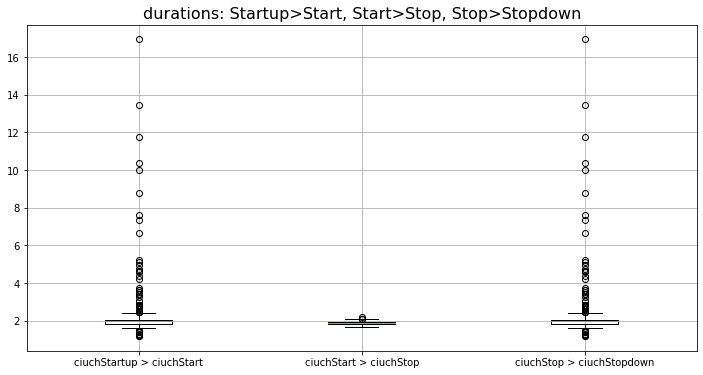

In [57]:
plt.figure(figsize=(12,6))
up=(timing['ciuchStart']-timing['ciuchStartup']).apply(lambda x:x.total_seconds())
mid=(timing['ciuchStop']-timing['ciuchStart']).apply(lambda x:x.total_seconds())
down=(timing['ciuchStopdown']-timing['ciuchStop']).apply(lambda x:x.total_seconds())
plt.boxplot([up,mid,down],labels=['ciuchStartup > ciuchStart','ciuchStart > ciuchStop','ciuchStop > ciuchStopdown'])
plt.grid()
plt.title('durations: Startup>Start, Start>Stop, Stop>Stopdown',size=16)
plt.show()

In [58]:
#  full window (ciuchStartup > ciuchStopdown) is sliced in smaller slices
# ciuchStartup > ciuchStart: 11 slices named up_0, up_1, ..., up_10
# ciuchStart > ciuchStop: 11 slices named mid_0, mid_1, ... mid_10
# ciuchStop > ciuchStopdown: 11 slices names down_0, down_1, ... down_10
slices=pd.DataFrame()
for i, row in timing .iterrows():
    ciuchStartup=row['ciuchStartup']
    ciuchStart=row['ciuchStart']
    ciuchStop=row['ciuchStop']
    ciuchStopdown=row['ciuchStopdown']
    steps=4
#     
    up=pd.DataFrame(index=pd.date_range(start=ciuchStartup, end=ciuchStart,periods=steps,closed='left'))\
        .reset_index(drop=False).rename(columns={'index':'slice'})
    up.index=['up_'+str(x) for x in range(steps-1)]
    slices=slices.append(up)
#     
    mid=pd.DataFrame(index=pd.date_range(start=ciuchStart, end=ciuchStop,periods=steps,closed='left'))\
        .reset_index(drop=False).rename(columns={'index':'slice'})
    mid.index=['mid_'+str(x) for x in range(steps-1)]
    slices=slices.append(mid)
#     
    down=pd.DataFrame(index=pd.date_range(start=ciuchStop, end=ciuchStopdown,periods=steps,closed='left'))\
        .reset_index(drop=False).rename(columns={'index':'slice'})
    down.index=['down_'+str(x) for x in range(steps-1)]
    slices=slices.append(down)
#     slices=slices.append(up)
slices=slices.reset_index(drop=False).rename(columns={'index':'slice_id'})
# 
timing_slices=pd.merge_asof(slices,timing,left_on='slice',right_on='ciuchStartup',direction='backward')
timing_slices=timing_slices[['run', 'refListId', 'refListId_last','slice_id','slice',  \
                             'ciuchStartup', 'ciuchStart', 'ciuchStop', 'ciuchStopdown','t0_run']]
timing_slices.head()

,run,refListId,refListId_last,slice_id,slice,ciuchStartup,ciuchStart,ciuchStop,ciuchStopdown,t0_run
0,1,0,0,up_0,2019-11-07 18:53:42.369999872,2019-11-07 18:53:42.369999872,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.416999936,2019-11-07 18:53:42.369999872
1,1,0,0,up_1,2019-11-07 18:53:45.703333248,2019-11-07 18:53:42.369999872,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.416999936,2019-11-07 18:53:42.369999872
2,1,0,0,up_2,2019-11-07 18:53:49.036666624,2019-11-07 18:53:42.369999872,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.416999936,2019-11-07 18:53:42.369999872
3,1,0,0,mid_0,2019-11-07 18:53:52.370000000,2019-11-07 18:53:42.369999872,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.416999936,2019-11-07 18:53:42.369999872
4,1,0,0,mid_1,2019-11-07 18:53:52.979000000,2019-11-07 18:53:42.369999872,2019-11-07 18:53:52.370,2019-11-07 18:53:54.197,2019-11-07 18:53:58.416999936,2019-11-07 18:53:42.369999872


In [59]:
len(timing_slices)

3501

In [60]:
# merge between df and timing
# merge_asof needs sorted df > df_ref
df=df[ (df['LogTime']>=timing['ciuchStartup'].min()) & (df['LogTime']<=timing['ciuchStopdown'].max())  ]
df=df.sort_values('LogTime')
# 
# each row in df_ref is merged with the last row in timing where timing (ciuchstart_up) < df_ref (logtime)
# 
# df_timing=pd.merge_asof(df_ref,timing,left_on=['LogTime'],right_on=['ciuchStartup'],direction='backward')
# df_timing=df_timing.dropna()
# df_timing=df_timing.sort_values('LogTime').reset_index(drop=True)
# df_timing=df_timing[['run', 'Epc','refListId', 'refListId_last', 'ciuchStartup',\
#                      'LogTime', 'ciuchStop', 'ciuchStopdown','Rssi', 'loc', 'refListId_actual']]
# 
# each row in df_ref is merged with the last row in timing_slices where timing (slice) < df_ref (logtime)
# 
df_timing_slices=pd.merge_asof(df,timing_slices,left_on=['LogTime'],right_on=['slice'],direction='backward')
df_timing_slices=df_timing_slices.dropna()
df_timing_slices=df_timing_slices.sort_values('slice').reset_index(drop=True)
df_timing_slices=df_timing_slices[['run', 'Epc','refListId', 'refListId_last', 'ciuchStartup','slice_id','slice','LogTime', \
                      'ciuchStart','ciuchStop', 'ciuchStopdown', 'Rssi', 'loc','t0_run']]


In [61]:
# 

In [62]:
# df_timing_slices=pd.merge(df_timing_slices, reflist, on='Epc',how='left')
# df_timing_slices = df_timing_slices [ ~((df_timing_slices['refListId']==0) & (df_timing_slices['refListId_actual']==9)) ]
# # 
# df_timing_slices = df_timing_slices [ ~((df_timing_slices['refListId']==9) & (df_timing_slices['refListId_actual']==0)) ]
# # # 
# # df_timing_slices = df_timing_slices [ ~((df_timing_slices['refListId']==0) | (df_timing_slices['refListId_actual']==0)) ]

# df_timing_slices=df_timing_slices.drop(['refListId_actual','Q refListId_actual'],axis=1)

In [63]:
runs_out=df_timing_slices .groupby('run')['refListId'].nunique().rename('Q refListId').reset_index(drop=False)
runs_out[runs_out['Q refListId']!=10]

,run,Q refListId
15,16,9
22,23,9
31,32,9
39,40,2


In [64]:
current_last_windows=timing_slices.drop_duplicates(['run','refListId','refListId_last'])
current_last_windows=current_last_windows[['run','refListId','refListId_last','ciuchStop']].reset_index(drop=True)
current_last_windows[:1]

,run,refListId,refListId_last,ciuchStop
0,1,0,0,2019-11-07 18:53:54.197


In [65]:
# runs 16 23 32 40 have missing boxes: discarded
# also run 1 is the start, no previous box: discarded
# run 18: box 0 run at the end
# 
timing=timing[~timing['run'].isin([1,18,16,23,32,40])]
timing_slices=timing_slices[~timing_slices['run'].isin([1,18,16,23,32,40])]
df_timing_slices=df_timing_slices[~df_timing_slices['run'].isin([1,18,16,23,32,40])]

df_timing_slices=df_timing_slices.sort_values(['LogTime','Epc'])
# 

In [66]:
len(timing),len(timing_slices), len(df_timing_slices)

(340, 3060, 307965)

In [67]:
df_timing_slices[:1]

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run
8970,2,epc_100,0,9,2019-11-07 18:54:55.894500096,up_0,2019-11-07 18:54:55.894500096,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.764999936,-68.0,in,2019-11-07 18:54:55.894500096


In [24]:
# df_timing_slices['dt']=
df_timing_slices['dt']=(df_timing_slices['LogTime']-df_timing_slices['t0_run']).apply(lambda x:x.total_seconds())

In [25]:
df_timing_slices[:1]

,run,Epc,refListId,refListId_last,ciuchStartup,slice_id,slice,LogTime,ciuchStart,ciuchStop,ciuchStopdown,Rssi,loc,t0_run,dt
8970,2,epc_100,0,9,2019-11-07 18:54:55.894500096,up_0,2019-11-07 18:54:55.894500096,2019-11-07 18:54:56,2019-11-07 18:54:57.738,2019-11-07 18:54:59.584,2019-11-07 18:55:01.764999936,-68.0,in,2019-11-07 18:54:55.894500096,0.1055


In [26]:
# 
# df_timing_threshold
# 

In [27]:
rssi_threshold=-110
df_timing_slices_threshold=df_timing_slices[df_timing_slices['Rssi']>rssi_threshold]

In [28]:
# readrate
# readrate
round(100*df_timing_slices_threshold.reset_index(drop=False).groupby(['run','loc'])['Epc'].nunique().groupby('loc').mean()\
    /reflist['Epc'].nunique(),2)

loc
in     100.00
out     99.29
Name: Epc, dtype: float64